In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [3]:
enddate = date.datetime(2020,3,20)
startdate = date.datetime(2019,3,20)
tick = 'AMOV'
data = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [4]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,15.32,14.65,14.66,15.32,12100.0,14.950639
2019-03-21,15.28,15.01,15.15,15.28,3700.0,14.911603
2019-03-22,14.77,14.61,14.67,14.77,1200.0,14.413900
2019-03-25,14.93,14.56,14.93,14.56,700.0,14.208963
2019-03-26,14.57,14.47,14.47,14.57,2300.0,14.218720


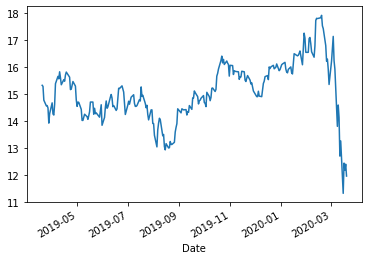

In [5]:
%matplotlib inline
data.Close.plot()

In [6]:
def BBANDS(df,n):
    MA= pd.Series(pd.Series.rolling(df['Close'], n).mean())
    MSD=pd.Series(pd.Series.rolling(df['Close'], n).std())
    b1=MA + (MSD*2)
    B1= pd.Series(b1, name = 'BollingerB_' + str(n))
    df= df.join(B1)
    b2= MA - (MSD*2)
    B2= pd.Series(b2, name = 'Bollinger%b_' + str(n))
    df = df.join(B2)
    return df

In [7]:
df = BBANDS(data,20)

In [8]:
df2 = df[['Close','BollingerB_20','Bollinger%b_20']]

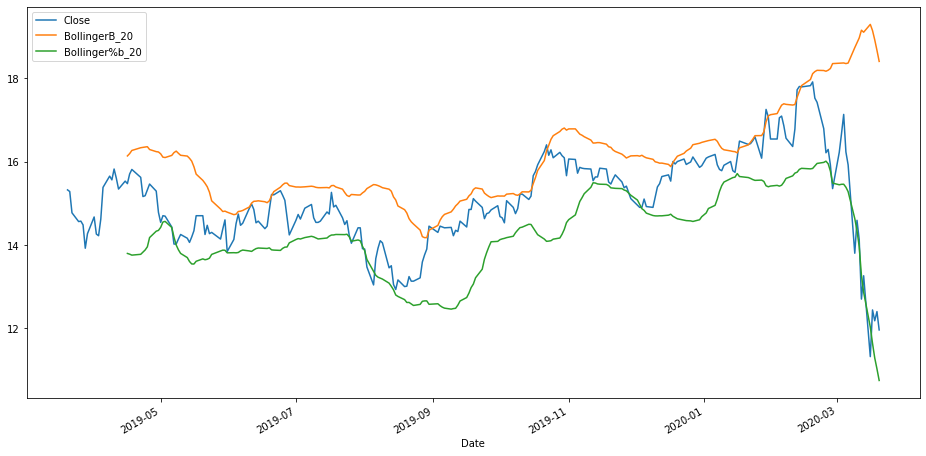

In [9]:
df2.plot(figsize = (16,8))

In [10]:
a = df['BollingerB_20']
b = df['Bollinger%b_20']

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Comportamiento'] = 'Entre bandas'
data.loc[data['Close'] <b, 'Comportamiento'] = 'Cruce de banda superior'
data.loc[data['Close'] >a, 'Comportamiento'] = 'Cruce de banda inferior'

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Recomendacion'] = '-'
data.loc[data['Close'] <b, 'Recomendacion'] = 'Se recomienda vender la accion.'
data.loc[data['Close'] >a, 'Recomendacion'] = 'Se recomienda comprar la accion'

data["Recomendacion"] = data["Recomendacion"].fillna("-")
data["Comportamiento"] = data["Comportamiento"].fillna("Sin informacion")

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
data[['Close','Comportamiento', 'Recomendacion']]

,Close,Comportamiento,Recomendacion
Date,,,
2019-03-20,15.320000,Sin informacion,-
2019-03-21,15.280000,Sin informacion,-
2019-03-22,14.770000,Sin informacion,-
2019-03-25,14.560000,Sin informacion,-
2019-03-26,14.570000,Sin informacion,-
2019-03-27,14.480000,Sin informacion,-
2019-03-28,13.920000,Sin informacion,-
2019-03-29,14.270000,Sin informacion,-
2019-04-01,14.670000,Sin informacion,-
